# "Vehicles."

### _"Recognizing vehicle type from its silhouette" (Classification task)._

## Table of Contents


## Part 0: Introduction

### Overview
The dataset that's we see here contains 19 columns and 846 entries of data about vehicle types.
    
**Метаданные:**
    
* **Class (target)** 

* **COMPACTNESS**

* **CIRCULARITY** 

* **DISTANCE_CIRCULARITY** 

* **RADIUS_RATIO** 

* **PR.AXIS_ASPECT_RATIO** 

* **MAX.LENGTH_ASPECT_RATIO**

* **SCATTER_RATIO** 

* **ELONGATEDNESS** 

* **PR.AXIS_RECTANGULARITY** 

* **MAX.LENGTH_RECTANGULARITY** 

* **SCALED_VARIANCE_MAJOR** 

* **SCALED_VARIANCE_MINOR** 

* **SCALED_RADIUS_OF_GYRATION** 

* **SKEWNESS_ABOUT_MAJOR** 

* **SKEWNESS_ABOUT_MINOR** 

* **KURTOSIS_ABOUT_MAJOR** 

* **KURTOSIS_ABOUT_MINOR** 

* **HOLLOWS_RATIO** 


### Questions:
    
Определите класс транспортного средства по набору данных, описывающих геометрические особенности силуэтов транспортных средств, полученных по фотографиям для распознавания изображений (use multi-class classification; check balance of classes; calculate perdictions).


## [Part 1: Import, Load Data](#Part-1:-Import,-Load-Data.)
* ### Import libraries, Read data from ‘.csv’ file

## [Part 2: Exploratory Data Analysis](#Part-2:-Exploratory-Data-Analysis.)
* ### Info, Head, Describe
* ### 'Class' attribute value counts and visualisation
* ### Label encoder for 'Class' attribute
* ### Vizualisation of all attributes
* ### Correlation plot of each attribute
* ### Correlation list of each attribute
* ### Drop column 'Class'

## [Part 3: Data Wrangling and Transformation](#Part-3:-Data-Wrangling-and-Transformation.)
* ### StandardScaler
* ### Creating datasets for ML part
* ### 'Train\Test' splitting method

## [Part 4: Machine Learning](#Part-4:-Machine-Learning.)
* ### Build, train and evaluate model
    * #### SVC 
    * #### Classification report
    * #### Confusion Matrix
    * #### Misclassification plot
    * #### Comparison table between Actual 'Class' and Predicted 'Class'

## [Conclusion](#Conclusion.)

## Part 1: Import, Load Data.

* ### Import libraries

In [1]:
# import standard libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
%matplotlib inline
sns.set()

import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.svm import SVC

import warnings
warnings.filterwarnings('ignore')

* ### Read data from ‘.csv’ file

In [2]:
# read data from '.csv' file
dataset = pd.read_csv('vehicles.csv') 

# initialisation of target
target = dataset['Class']

## Part 2: Exploratory Data Analysis.

* ### Info

In [3]:
# print the full summary of the dataset  
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
COMPACTNESS                  846 non-null int64
CIRCULARITY                  846 non-null int64
DISTANCE_CIRCULARITY         846 non-null int64
RADIUS_RATIO                 846 non-null int64
PR.AXIS_ASPECT_RATIO         846 non-null int64
MAX.LENGTH_ASPECT_RATIO      846 non-null int64
SCATTER_RATIO                846 non-null int64
ELONGATEDNESS                846 non-null int64
PR.AXIS_RECTANGULARITY       846 non-null int64
MAX.LENGTH_RECTANGULARITY    846 non-null int64
SCALED_VARIANCE_MAJOR        846 non-null int64
SCALED_VARIANCE_MINOR        846 non-null int64
SCALED_RADIUS_OF_GYRATION    846 non-null int64
SKEWNESS_ABOUT_MAJOR         846 non-null int64
SKEWNESS_ABOUT_MINOR         846 non-null int64
KURTOSIS_ABOUT_MAJOR         846 non-null int64
KURTOSIS_ABOUT_MINOR         846 non-null int64
HOLLOWS_RATIO                846 non-null int64
Class                        84

###### Dataset consists of 846 rows and 19 columns; 

has 2 datatypes: int64(18), object(1);

has no missing values.

* ### Head

In [4]:
# preview of the first 5 lines of the loaded data 
dataset.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,van
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,van
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,saab
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,van
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,bus


* ### Describe

In [5]:
dataset.describe()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO
count,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.000000,846.00000,846.000000,846.000000,846.000000,846.000000,846.000000
mean,93.678487,44.861702,82.088652,168.940898,61.693853,8.567376,168.839243,40.933806,20.582742,147.998818,188.625296,439.911348,174.70331,72.462175,6.377069,12.599291,188.932624,195.632388
std,8.234474,6.169866,15.771533,33.472183,7.888251,4.601217,33.244978,7.811560,2.592138,14.515652,31.394837,176.692614,32.54649,7.486974,4.918353,8.931240,6.163949,7.438797
min,73.000000,33.000000,40.000000,104.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.00000,59.000000,0.000000,0.000000,176.000000,181.000000
25%,87.000000,40.000000,70.000000,141.000000,57.000000,7.000000,146.250000,33.000000,19.000000,137.000000,167.000000,318.250000,149.00000,67.000000,2.000000,5.000000,184.000000,190.250000
50%,93.000000,44.000000,80.000000,167.000000,61.000000,8.000000,157.000000,43.000000,20.000000,146.000000,178.500000,364.000000,173.00000,71.500000,6.000000,11.000000,188.000000,197.000000
75%,100.000000,49.000000,98.000000,195.000000,65.000000,10.000000,198.000000,46.000000,23.000000,159.000000,217.000000,587.000000,198.00000,75.000000,9.000000,19.000000,193.000000,201.000000
max,119.000000,59.000000,112.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,268.00000,135.000000,22.000000,41.000000,206.000000,211.000000


* ### 'Class' attribute value counts and visualisation

In [6]:
# target attribute value counts
dataset['Class'].value_counts()

bus     218
saab    217
opel    212
van     199
Name: Class, dtype: int64

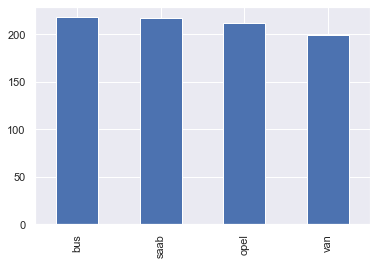

In [7]:
# target attribute visualisation plot
dataset['Class'].value_counts().plot(x = dataset['Class'], kind='bar')

Our dataset is balanced.

* ### Label encoder for 'Class' attribute

In [8]:
# label encoder for 'Class' attribute
le = LabelEncoder()
dataset['Class'] = le.fit_transform(dataset['Class'])
dataset.head()

,COMPACTNESS,CIRCULARITY,DISTANCE_CIRCULARITY,RADIUS_RATIO,PR.AXIS_ASPECT_RATIO,MAX.LENGTH_ASPECT_RATIO,SCATTER_RATIO,ELONGATEDNESS,PR.AXIS_RECTANGULARITY,MAX.LENGTH_RECTANGULARITY,SCALED_VARIANCE_MAJOR,SCALED_VARIANCE_MINOR,SCALED_RADIUS_OF_GYRATION,SKEWNESS_ABOUT_MAJOR,SKEWNESS_ABOUT_MINOR,KURTOSIS_ABOUT_MAJOR,KURTOSIS_ABOUT_MINOR,HOLLOWS_RATIO,Class
0,95,48,83,178,72,10,162,42,20,159,176,379,184,70,6,16,187,197,3
1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,3
4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,0


* ###  Vizualisation of all attributes

In [1]:
# vizualisation (first part of attributes)
one = ['Class', 'ELONGATEDNESS', 'SCALED_VARIANCE_MAJOR', 'SCALED_VARIANCE_MINOR', 'SCATTER_RATIO', 'PR.AXIS_RECTANGULARITY', 'HOLLOWS_RATIO']
df1 = dataset[one]
sns.pairplot(df1, kind="scatter",  hue="Class", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

NameError: name 'dataset' is not defined

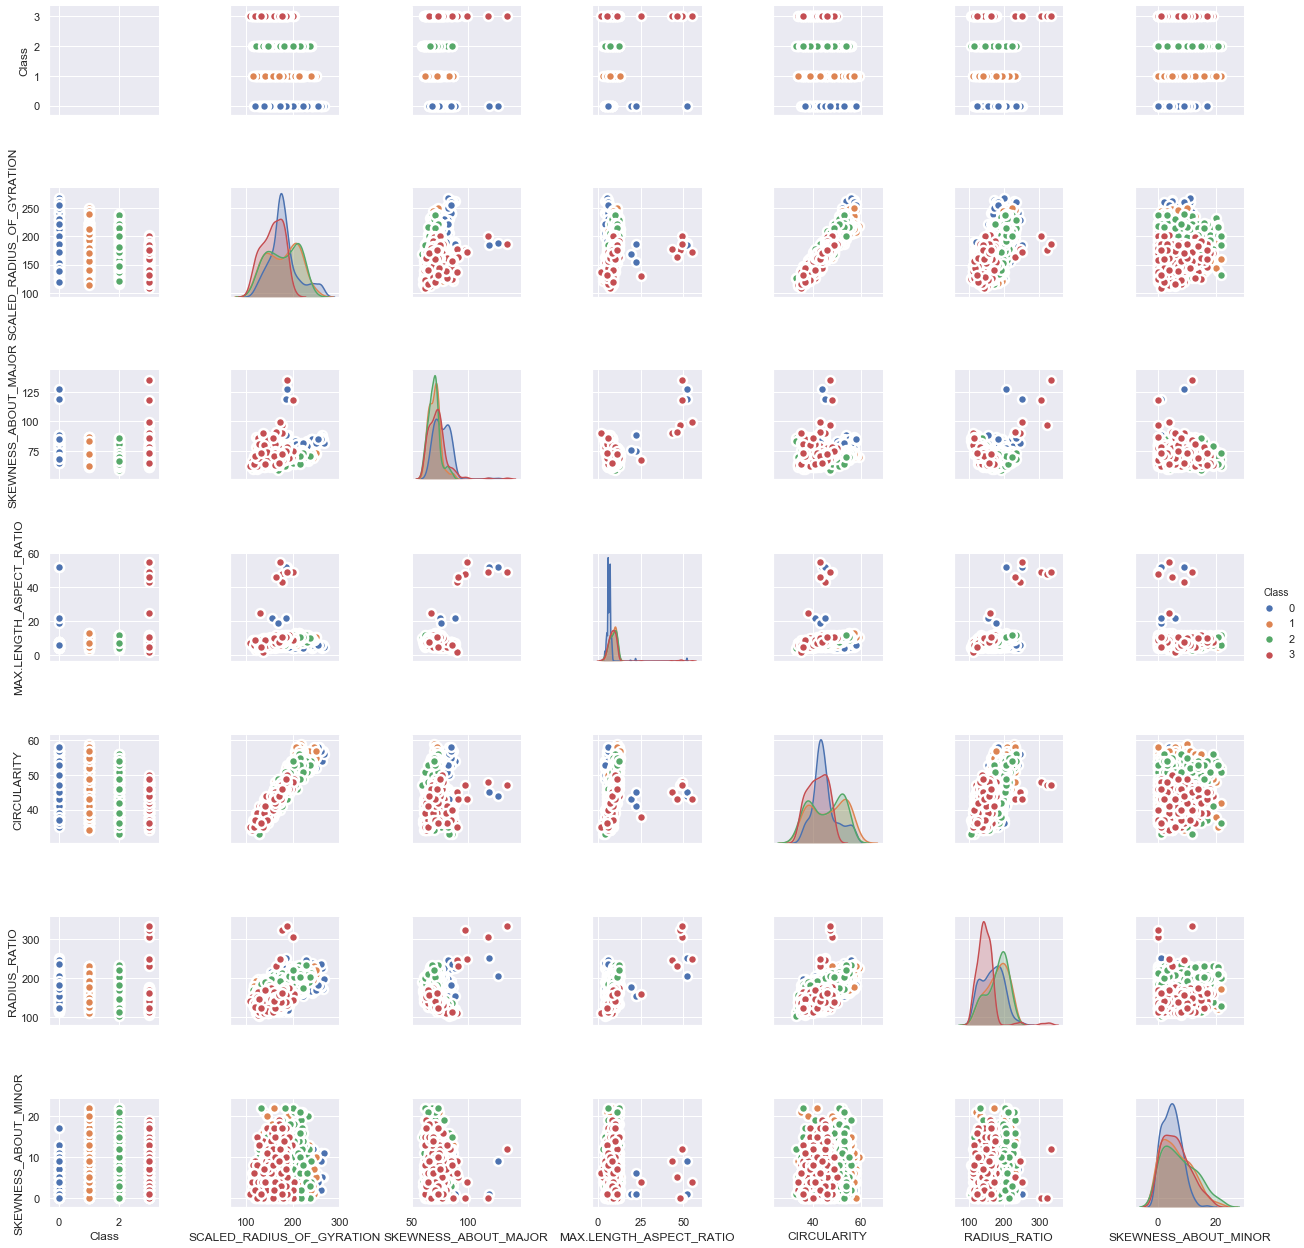

In [10]:
# vizualisation (second part of attributes)
two = ['Class', 'SCALED_RADIUS_OF_GYRATION', 'SKEWNESS_ABOUT_MAJOR', 'MAX.LENGTH_ASPECT_RATIO', 'CIRCULARITY', 'RADIUS_RATIO', 'SKEWNESS_ABOUT_MINOR']
df2 = dataset[two]
sns.pairplot(df2, kind="scatter",  hue="Class", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

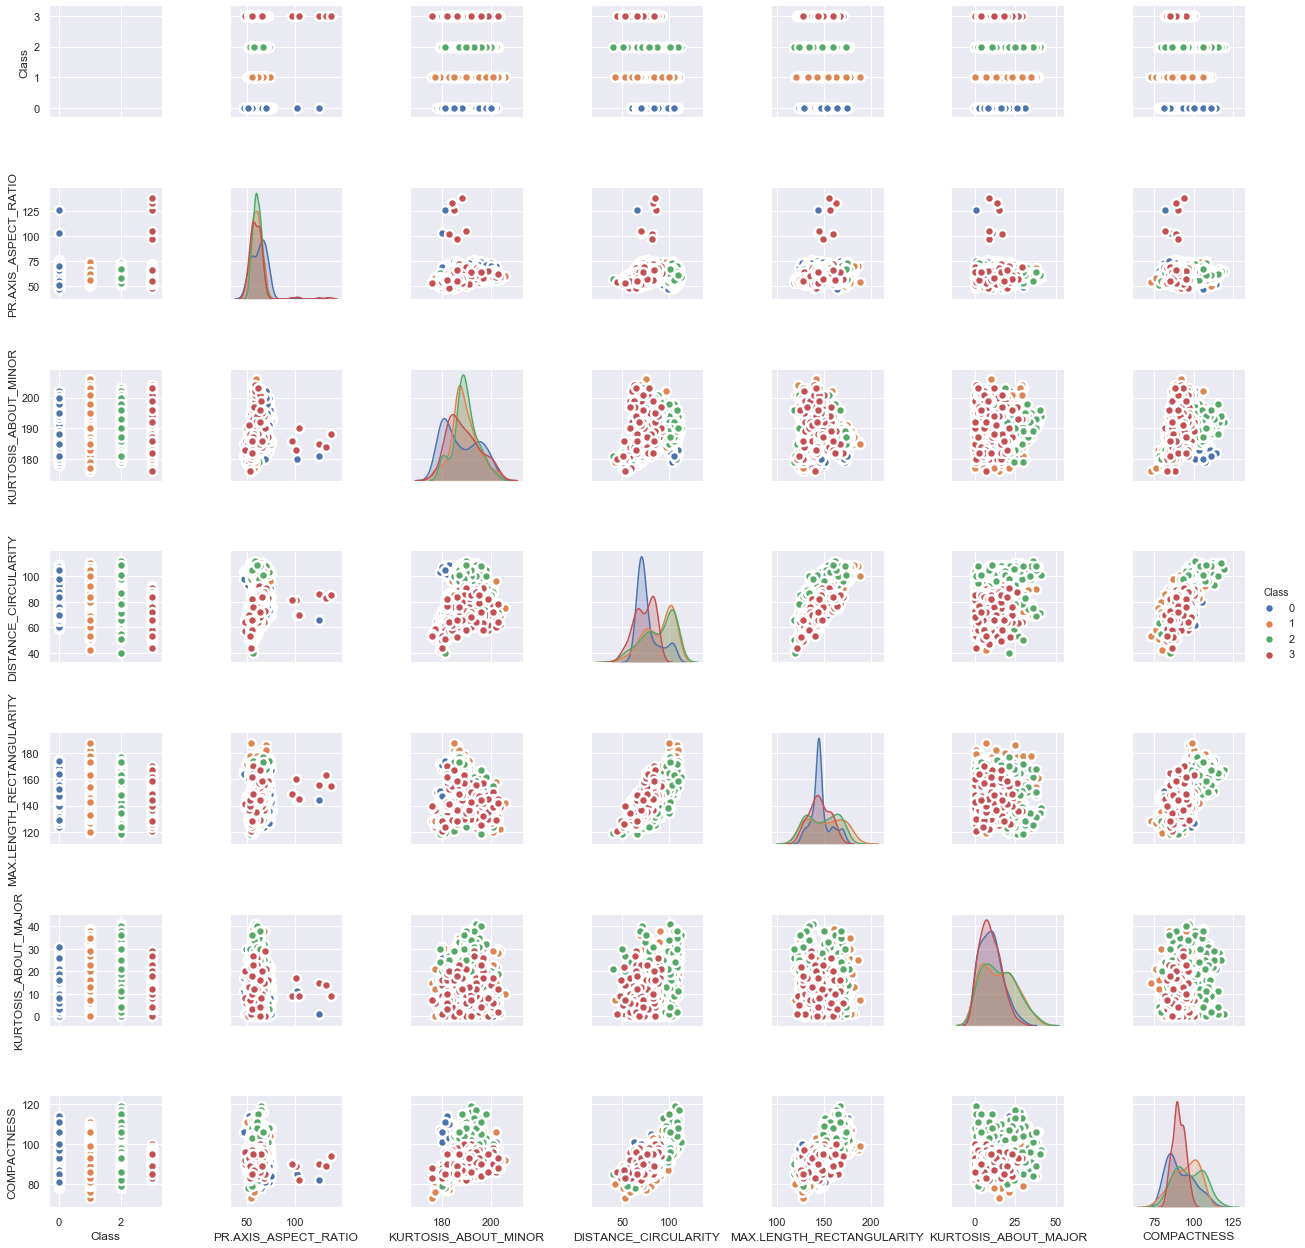

In [11]:
# vizualisation (third part of attributes)
three = ['Class', 'PR.AXIS_ASPECT_RATIO','KURTOSIS_ABOUT_MINOR','DISTANCE_CIRCULARITY','MAX.LENGTH_RECTANGULARITY','KURTOSIS_ABOUT_MAJOR','COMPACTNESS']
df3 = dataset[three]
sns.pairplot(df3, kind="scatter",  hue="Class", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

* ###  Correlation plot of each attribute

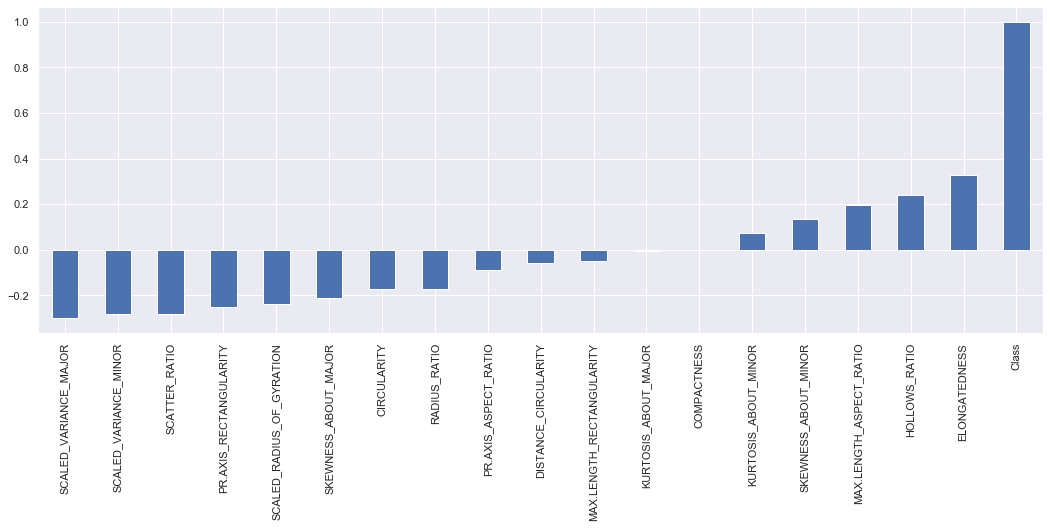

In [12]:
# corelation plot 
dataset.corr()['Class'].sort_values().plot(kind='bar', figsize=(18, 6))

* ###  Correlation list of each attribute

In [13]:
# correlation list
corr = dataset.corr()
corr_abs = corr.abs()

num_cols = len(dataset)
num_corr = corr_abs.nlargest(num_cols, 'Class')['Class']
print(num_corr)

Class                        1.000000
ELONGATEDNESS                0.326903
SCALED_VARIANCE_MAJOR        0.300917
SCALED_VARIANCE_MINOR        0.281097
SCATTER_RATIO                0.280903
PR.AXIS_RECTANGULARITY       0.249787
HOLLOWS_RATIO                0.238360
SCALED_RADIUS_OF_GYRATION    0.237618
SKEWNESS_ABOUT_MAJOR         0.210035
MAX.LENGTH_ASPECT_RATIO      0.195172
CIRCULARITY                  0.174246
RADIUS_RATIO                 0.173949
SKEWNESS_ABOUT_MINOR         0.135965
PR.AXIS_ASPECT_RATIO         0.090462
KURTOSIS_ABOUT_MINOR         0.071960
DISTANCE_CIRCULARITY         0.059804
MAX.LENGTH_RECTANGULARITY    0.050632
KURTOSIS_ABOUT_MAJOR         0.005710
COMPACTNESS                  0.000434
Name: Class, dtype: float64


* ### Drop column 'Class'

In [14]:
dataset = dataset.drop(columns=['Class'])